<a href="https://colab.research.google.com/github/prernasinghal88/Are-you-sure-to-Insure-/blob/version-3/Insurer_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurer Project

## Import Libraries

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Download Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import data
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/greyatom/test.csv')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/greyatom/train.csv')
sample = pd.read_csv('/content/drive/My Drive/Colab Notebooks/greyatom/sample_submission.csv')

df is the dataset we will be running our analysis and later modelling
test is the dataset we will be using our model on

Some Basic info about our dataset

In [133]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


Claim id the target variable which we will be predicting and rest others are features we will be using to predict claim.

## Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
ID                      50553 non-null int64
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision (in value)    50553 non-null float64
Gender                  14600 non-null object
Age                     50553 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [0]:
So there are total 11 features and one target variable. Out of these we have to select the best features out of these for building a correct model

### Profile Report

In [0]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Number of variables,12
Number of observations,50553
Total Missing (%),5.9%
Total size in memory,4.6 MiB
Average record size in memory,96.0 B
Numeric,5
Categorical,6
Boolean,1
Date,0
Text (Unique),0
Rejected,0


### Basic Countplot 

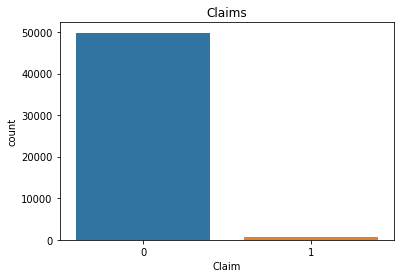

In [6]:
sns.countplot('Claim',data=df)
plt.title('Claims')
plt.show()

As per this we can estimate that not even 1% claims were passed. This is a highly imbalanced data.

### Pair Plot

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


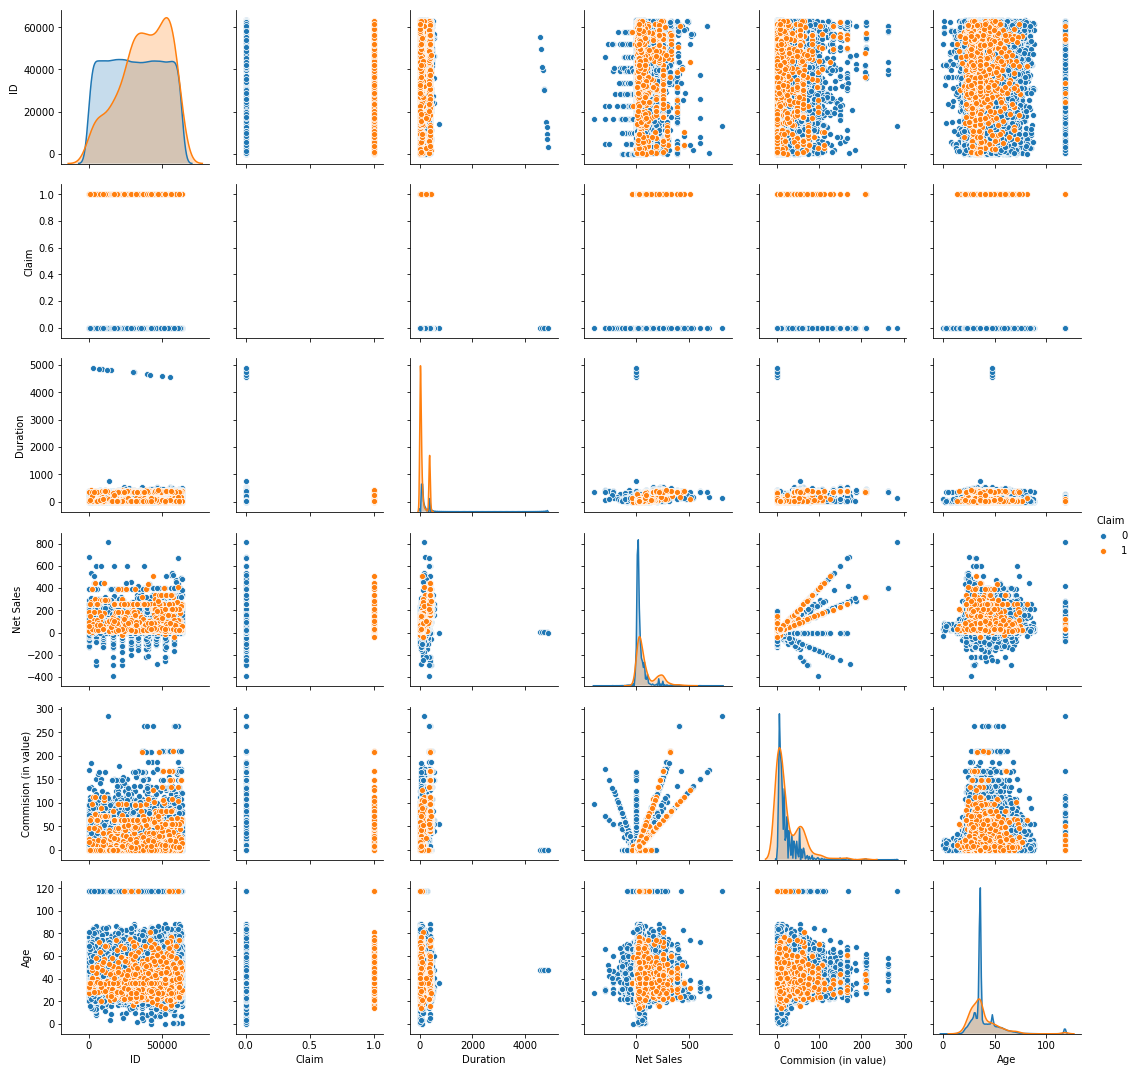

In [7]:
sns.pairplot(df, hue='Claim')

### Agency Type vs Claim

In [0]:
f,ax=plt.subplots(1,2,figsize=(10,6))
df[['Agency Type','Claim']].groupby(['Agency Type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('% claims for agency types')
sns.countplot('Agency Type',hue='Claim',data=df,ax=ax[1])
ax[1].set_title('Claims vs Agency Type')
plt.setp(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

Claim rate from Agency Type 'Airlines" is 3.5% whereas Agency type "Travel Agent" is only 1%.'

### Claims and Age Analysis

In [0]:
f,ax=plt.subplots(1, figsize=(10,6))
sns.barplot(x='Age',y='Claim',data=df)
ax.set_title('Claims Rate by Age')

Text(0.5, 1.0, 'Claims Rate by Age')

### Claims and Product Name Analysis

In [0]:
claim_y = df[df['Claim'] ==1]
f,ax=plt.subplots(1, figsize=(10,6))
ax = sns.countplot(x='Product Name',data=claim_y)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

In [0]:
df[['Product Name','Claim']].groupby(['Product Name']).mean().plot.bar()
plt.title('% claims for different products')
plt.show()

### Claims and Distribution Channel Analysis

In [8]:
df.groupby(['Distribution Channel','Claim'])['Claim'].count()

Distribution Channel  Claim
Offline               0          871
                      1           17
Online                0        48941
                      1          724
Name: Claim, dtype: int64

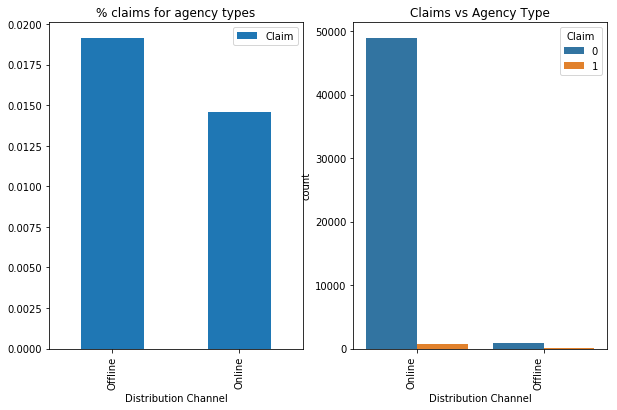

In [9]:
f,ax=plt.subplots(1,2,figsize=(10,6))
df[['Distribution Channel','Claim']].groupby(['Distribution Channel']).mean().plot.bar(ax=ax[0])
ax[0].set_title('% claims for agency types')
sns.countplot('Distribution Channel',hue='Claim',data=df,ax=ax[1])
ax[1].set_title('Claims vs Agency Type')
plt.setp(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


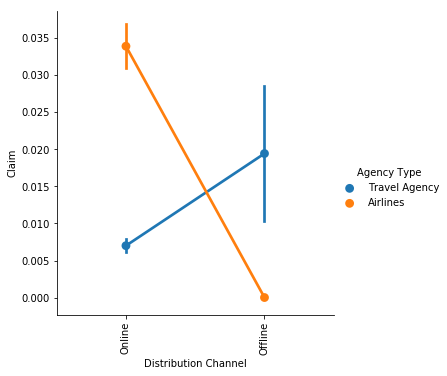

In [10]:
sns.factorplot('Distribution Channel','Claim',hue='Agency Type',data=df)
plt.xticks(rotation= 90)
plt.show()

### Crosstab Analysis for top variables

In [11]:
pd.crosstab([df['Distribution Channel'],df['Agency Type'],df['Claim']],df['Product Name'],margins=True)

Product Name                              1 way Comprehensive Plan  ...    All
Distribution Channel Agency Type   Claim                            ...       
Offline              Airlines      0                             0  ...     14
                     Travel Agency 0                             2  ...    857
                                   1                             2  ...     17
Online               Airlines      0                             0  ...  13490
                                   1                             0  ...    474
                     Travel Agency 0                          2638  ...  35451
                                   1                             6  ...    250
All                                                           2648  ...  50553

[8 rows x 26 columns]

### Boxplot (net sales vs. Claim)

[6.0, 4.0]


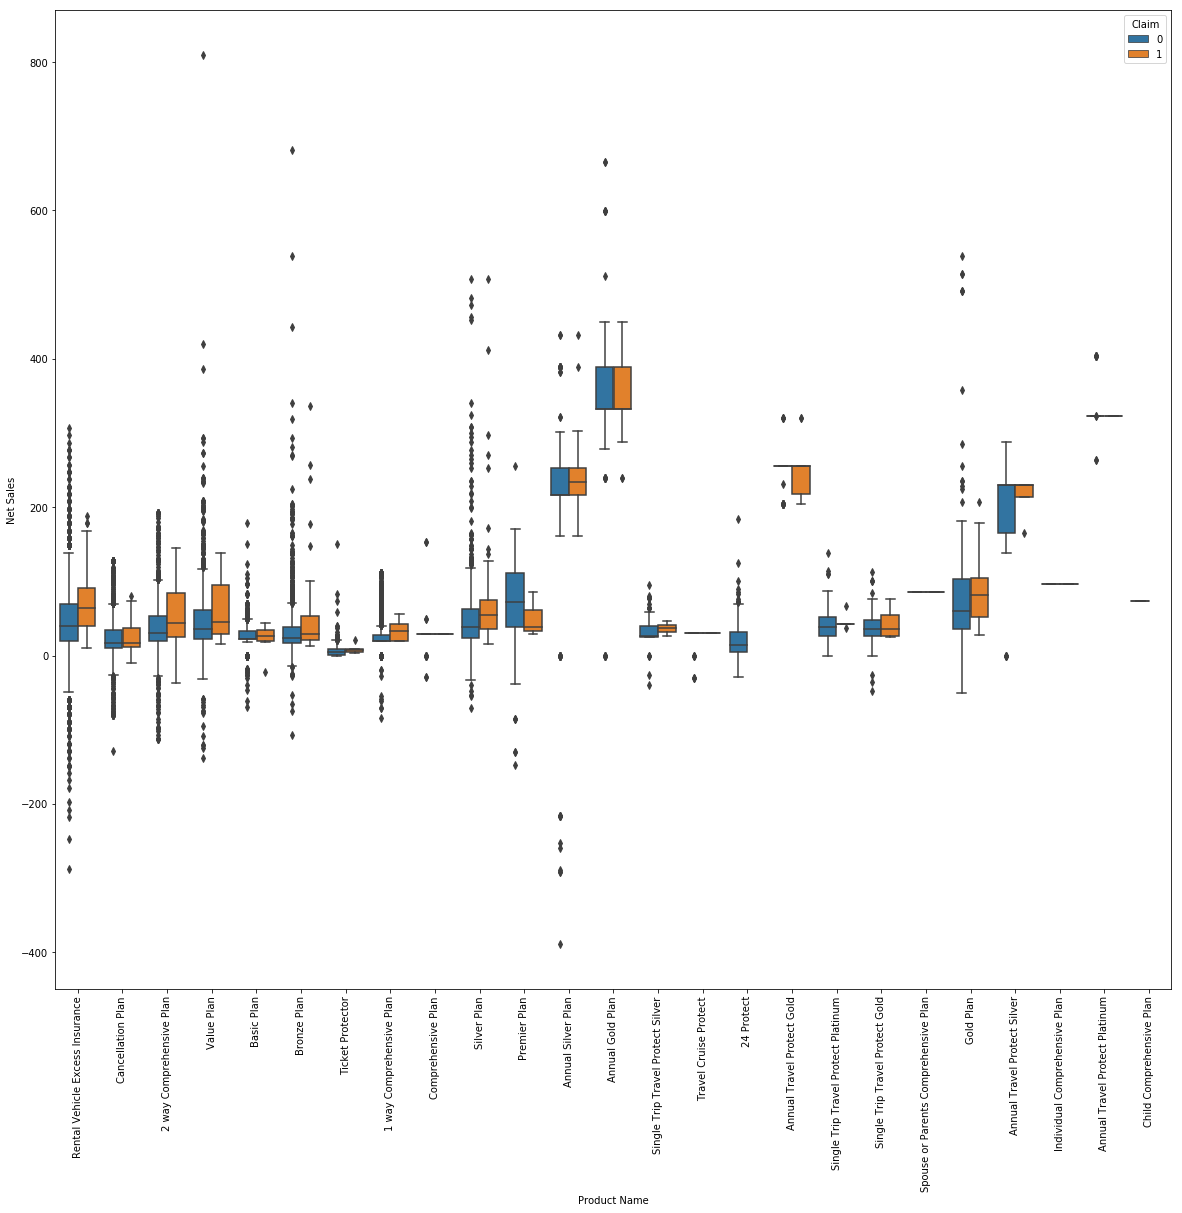

In [18]:
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)

fig_size[0] = 20
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size

sns.boxplot(x = 'Product Name', y = 'Net Sales',hue='Claim' ,data = df) 
plt.xticks(rotation= 90)
plt.show()

### BoxPlot (Commission Vs Claim)

[6.0, 4.0]


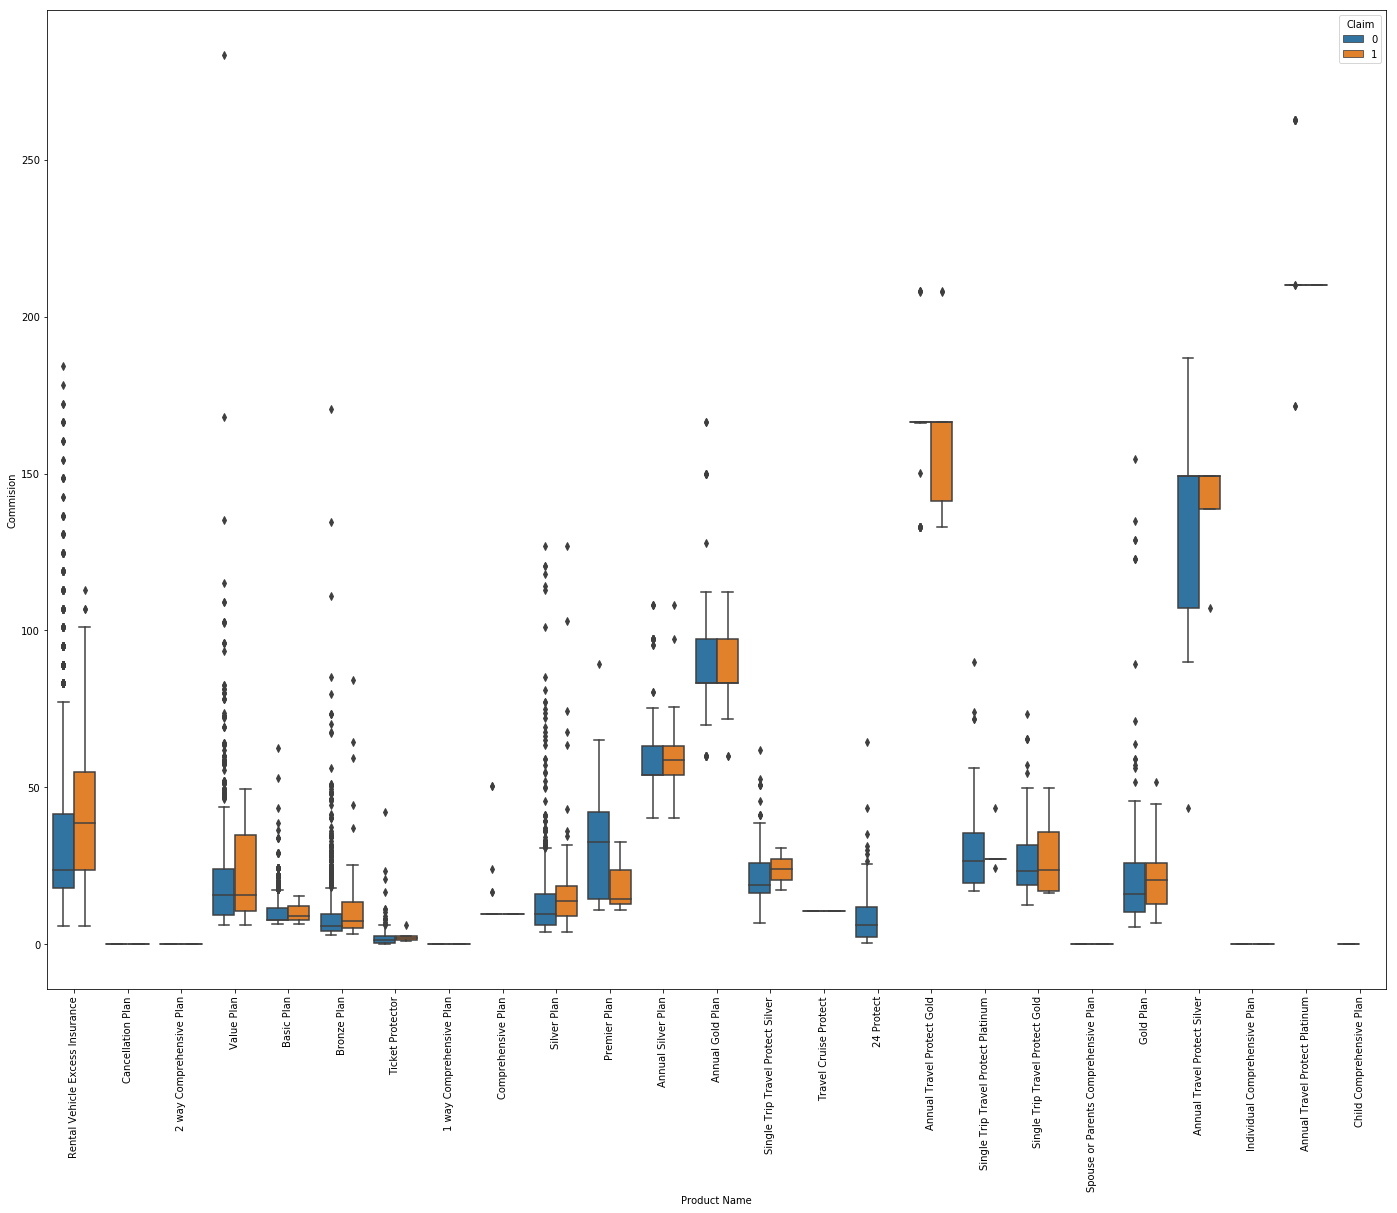

In [134]:
df.rename(columns={'Commision (in value)':'Commision'}, 
                 inplace=True)
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)

fig_size[0] = 24
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size

sns.boxplot(x = 'Product Name', y = 'Commision',hue='Claim' ,data = df) 
plt.xticks(rotation= 90)
plt.show()

## Data Cleanning

### Skewness

Skew of Univariate Distributions Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another. Many machine learning algorithms assume a Gaussian distribution. Knowing that an attribute has a skew may allow you to perform data preparation to correct the skew and later improve the accuracy of your models. You can calculate the skew of each attribute using the skew() function on the Pandas DataFrame.

In [12]:
# Skew for each attribute
skew = df.skew()
print(skew)

ID                       0.000141
Claim                    8.077216
Duration                22.872743
Net Sales                3.328243
Commision (in value)     4.078189
Age                      2.978478
dtype: float64


As per this table Duration is highly skewed.  Any other feature is not skewed that much. We will try and study how many outliers are there for Duration feature.

### Interquartile range

An outlier is anything smaller than Q1 or greater than Q3. Notice how the mean of "searches" after removal period is greater than Q3.

The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

In [13]:
from numpy import percentile
duration = df.Duration
# calculate interquartile range
q1 = df.Duration.quantile(q=.25)
q3 = df.Duration.quantile(q=.75)

iqr = q3 - q1
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q1, q3, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q1 - cut_off, q3 + cut_off
# identify outliers
outliers = [x for x in duration if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in duration if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=9.000, 75th=53.000, IQR=44.000
Identified outliers: 4465
Non-outlier observations: 46088


As noticed here, these outliers are actually important piece of information and thus need to be considered. 

### Negative Value - Net Sales

In [14]:
print('Maximum net sales :',df['Net Sales'].max())
print('Minimum Net sales :',df['Net Sales'].min())
print('Average Net Sales :',df['Net Sales'].mean())

Maximum net sales : 810.0
Minimum Net sales : -389.0
Average Net Sales : 40.80097659881748


There are certain values in net sales which are negative. But logically it seems we need to keep negative values as they may be representing some information.

### Remove Negative Value - Duration

In [135]:
print('Minimum Duration :',df['Duration'].min())

Minimum Duration : -2


In [136]:
df['Duration'][df['Duration'] < 0] = 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


We have replaced negative values in duration with 0 as they are only 3 in number.

### Age: Grouping by categories

Now, instead of keeping all numbers for age , we will be dividing it into categories.
0-16 - category 0
17-35 - category 1
35-64 - category 2
>64 - category 3

In [0]:
df['age_category'] = pd.cut(x=df['Age'], bins=[-1,17,36,65,120], labels=['0','1','2', '3'])

Text(0.5, 1.0, 'Claims Rate by Age')

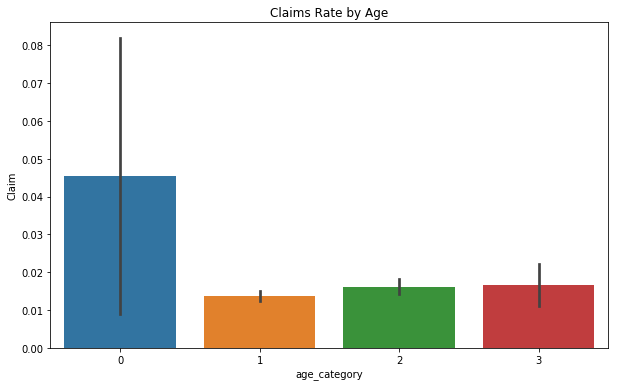

In [138]:
f,ax=plt.subplots(1, figsize=(10,6))
sns.barplot(x='age_category',y='Claim',data=df)
ax.set_title('Claims Rate by Age')

In [139]:
pd.crosstab(df['age_category'], df['Claim'])

Claim,0,1
age_category,,
0,105,5
1,32514,452
2,15246,251
3,1947,33


### Destination and Claims Analysis

In [140]:
pd.crosstab(df['Destination'], df['Claim'])

Claim,0,1
Destination,,
ARGENTINA,16,1
AUSTRALIA,2906,28
AUSTRIA,84,0
AZERBAIJAN,6,0
BAHRAIN,11,0
BANGLADESH,83,0
BELARUS,2,0
BELGIUM,36,0
BERMUDA,2,0


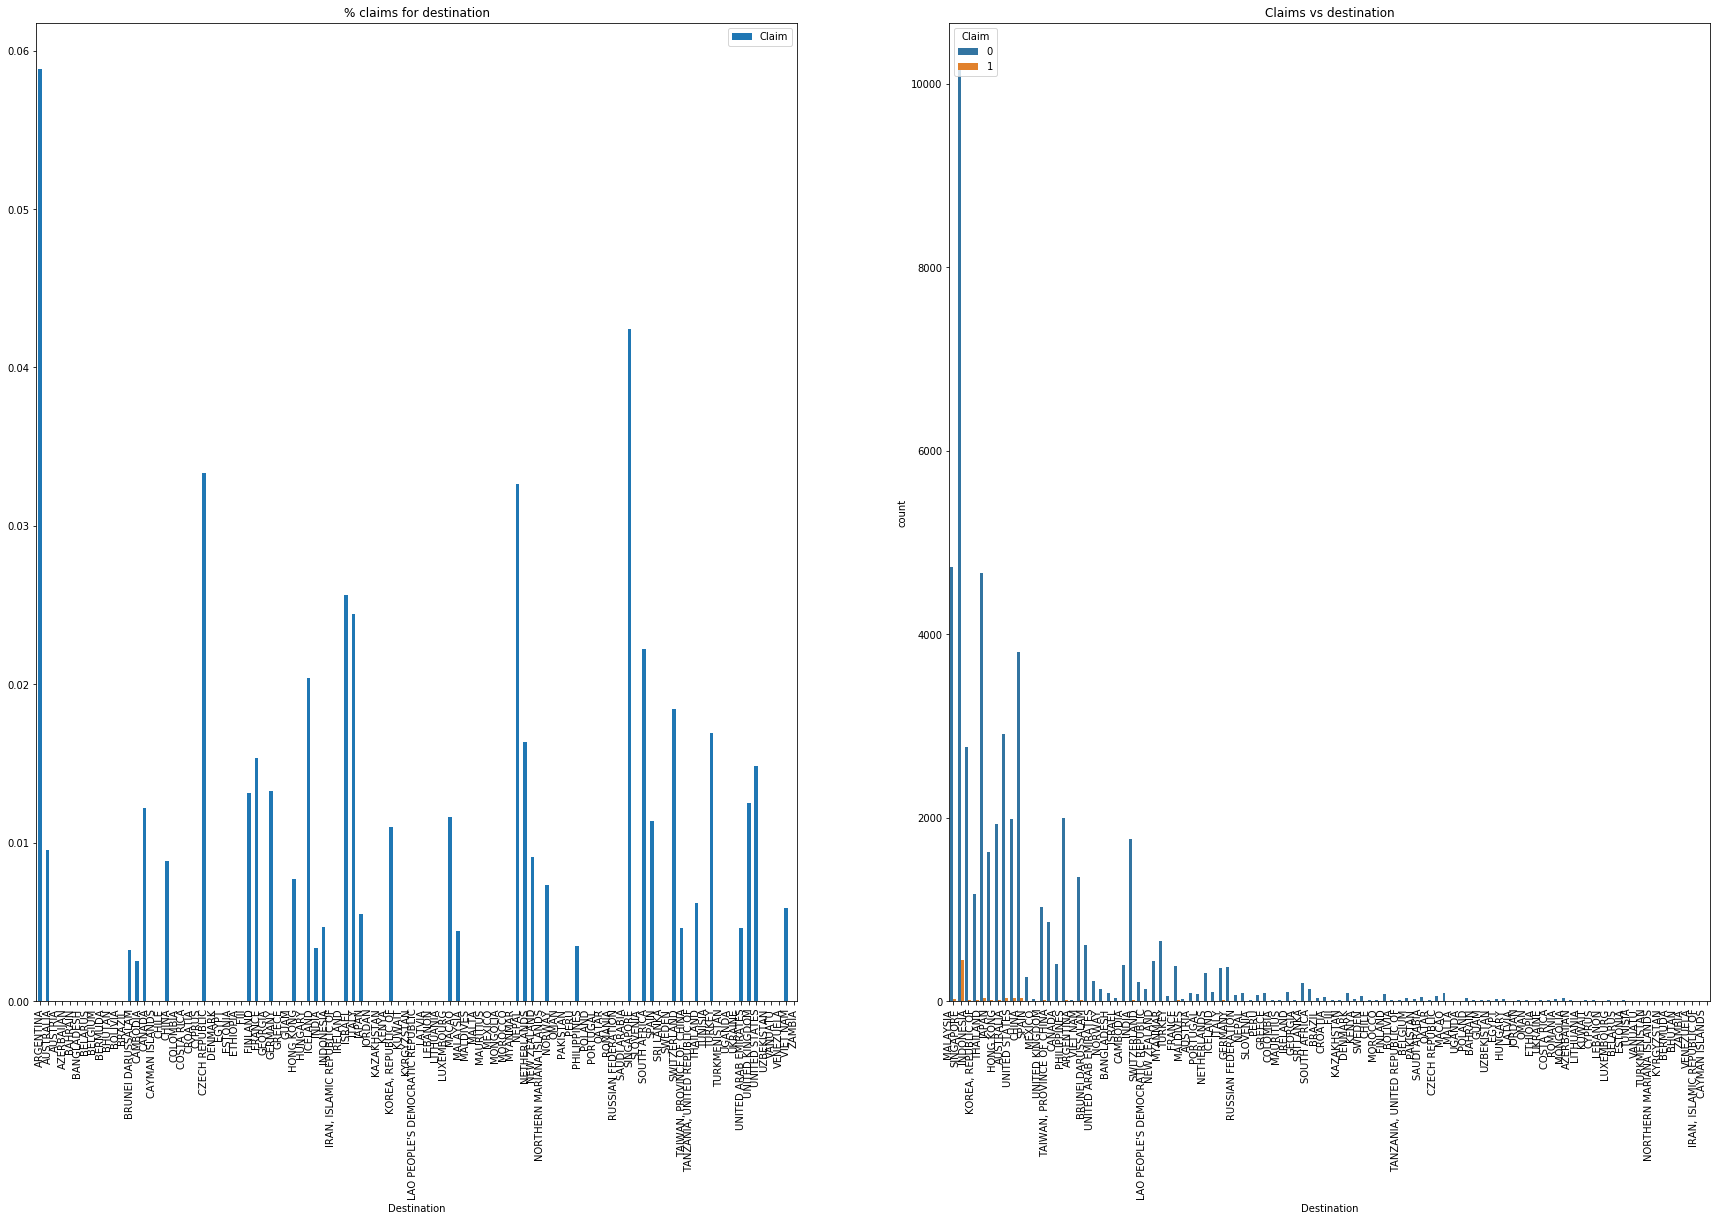

In [24]:
f,ax=plt.subplots(1,2,figsize=(30,18))
df[['Destination','Claim']].groupby(['Destination']).mean().plot.bar(ax=ax[0])
ax[0].set_title('% claims for destination')
sns.countplot('Destination',hue='Claim',data=df,ax=ax[1])
ax[1].set_title('Claims vs destination')
plt.setp(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

### CrossTab: Claim and Distribution Channel

In [25]:
pd.crosstab(df['Claim'], df['Distribution Channel'], normalize=True)

Distribution Channel,Offline,Online
Claim,,
0,0.017229,0.968113
1,0.000336,0.014322


96% of the bussines claims comers from Online channel.

### Correlation Analysis

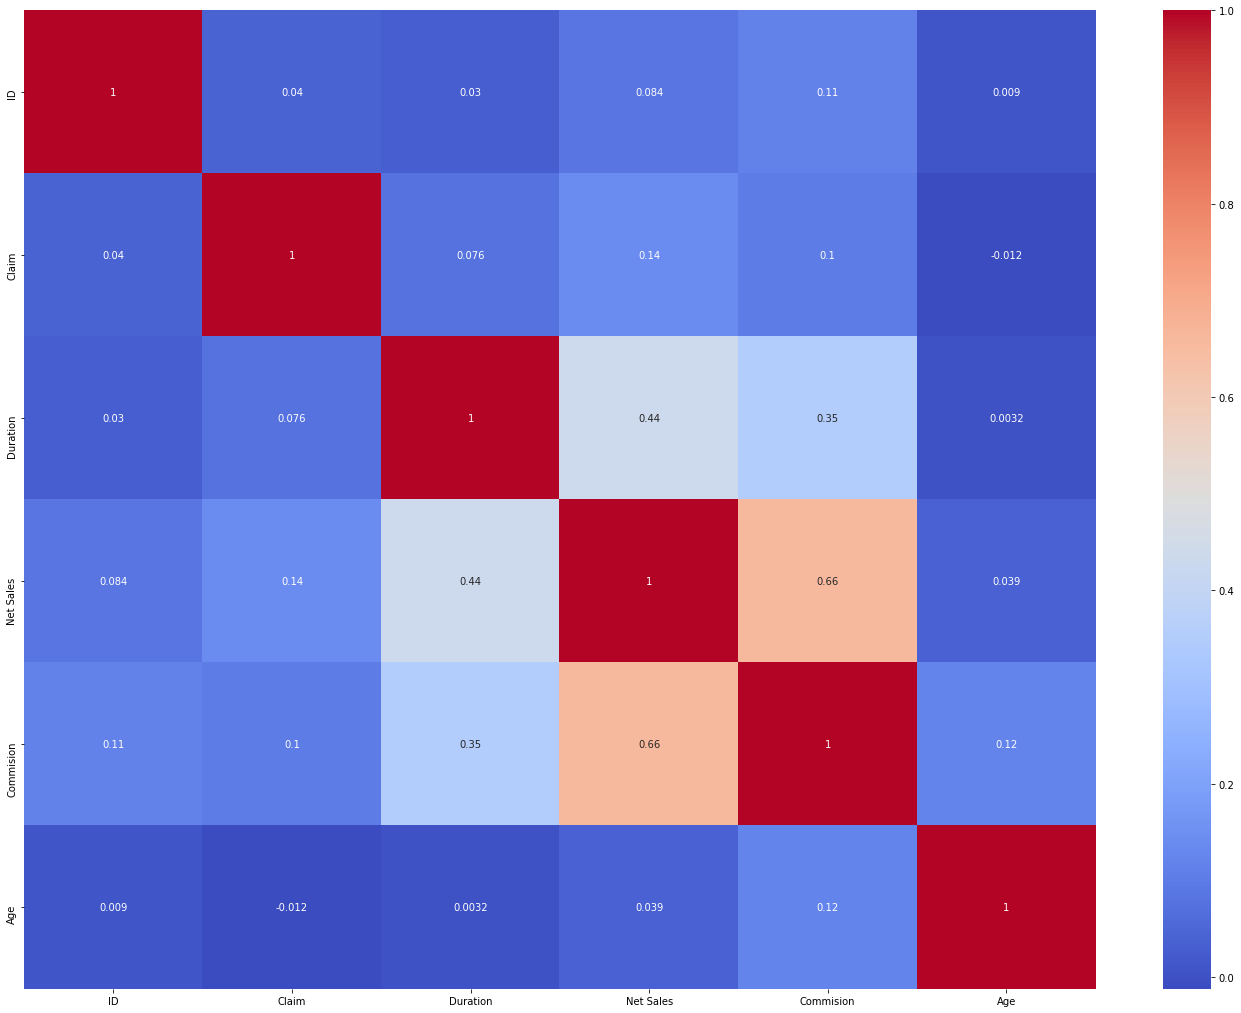

In [26]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

The most correlated variable to our target 'Claims" is "Net Sales".'

## Missing Data

### Detecting Missing Data

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 13 columns):
ID                      50553 non-null int64
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision               50553 non-null float64
Gender                  14600 non-null object
Age                     50553 non-null int64
age_category            50553 non-null category
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 4.7+ MB


More than 50% values for age are missing. So we will drop this column.

### Null Values Check

In [28]:
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision                   0
Gender                  35953
Age                         0
age_category                0
dtype: int64

### Drop Gender Variables

In [0]:
df = df.drop(['Gender'], axis=1)

Dropping gender feature as it has lot of missing values.

### Drop ID variable

In [0]:
df = df.drop(['ID'], axis=1)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 11 columns):
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision               50553 non-null float64
Age                     50553 non-null int64
age_category            50553 non-null category
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 3.9+ MB


Dropping ID as it is uniformly distributed over the dataset.

## Data Preparation

### One Hot Encoder

In [145]:
df.dtypes

Agency                    object
Agency Type               object
Distribution Channel      object
Product Name              object
Claim                      int64
Duration                   int64
Destination               object
Net Sales                float64
Commision                float64
Age                        int64
age_category            category
dtype: object

In [0]:
df  = pd.get_dummies(df, columns=['age_category'],prefix = ['age'])
df  = pd.get_dummies(df, columns=['Distribution Channel'],prefix = ['channel'])
df  = pd.get_dummies(df, columns=['Product Name'],prefix = ['product'])
df  = pd.get_dummies(df, columns=['Destination'],prefix = ['to'])
df  = pd.get_dummies(df, columns=['Agency'], prefix = ['agency'])
df  = pd.get_dummies(df, columns=['Agency Type'], prefix = ['agency_type'])

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Columns: 156 entries, Claim to agency_type_Travel Agency
dtypes: float64(2), int64(3), uint8(151)
memory usage: 9.2 MB


### Dropping age as it has been one hot encoded.



In [0]:
df = df.drop(['Age'], axis=1)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Columns: 155 entries, Claim to agency_type_Travel Agency
dtypes: float64(2), int64(2), uint8(151)
memory usage: 8.8 MB


### Separating the target variable

In [0]:
df_l = df.copy()
X = df_l.drop(['Claim'], axis=1)
y = df_l['Claim']

### Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

### Feature Selection -- PCA

Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form. Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal components in the transformed result. In the line of code below, we use PCA and select 3 principal components

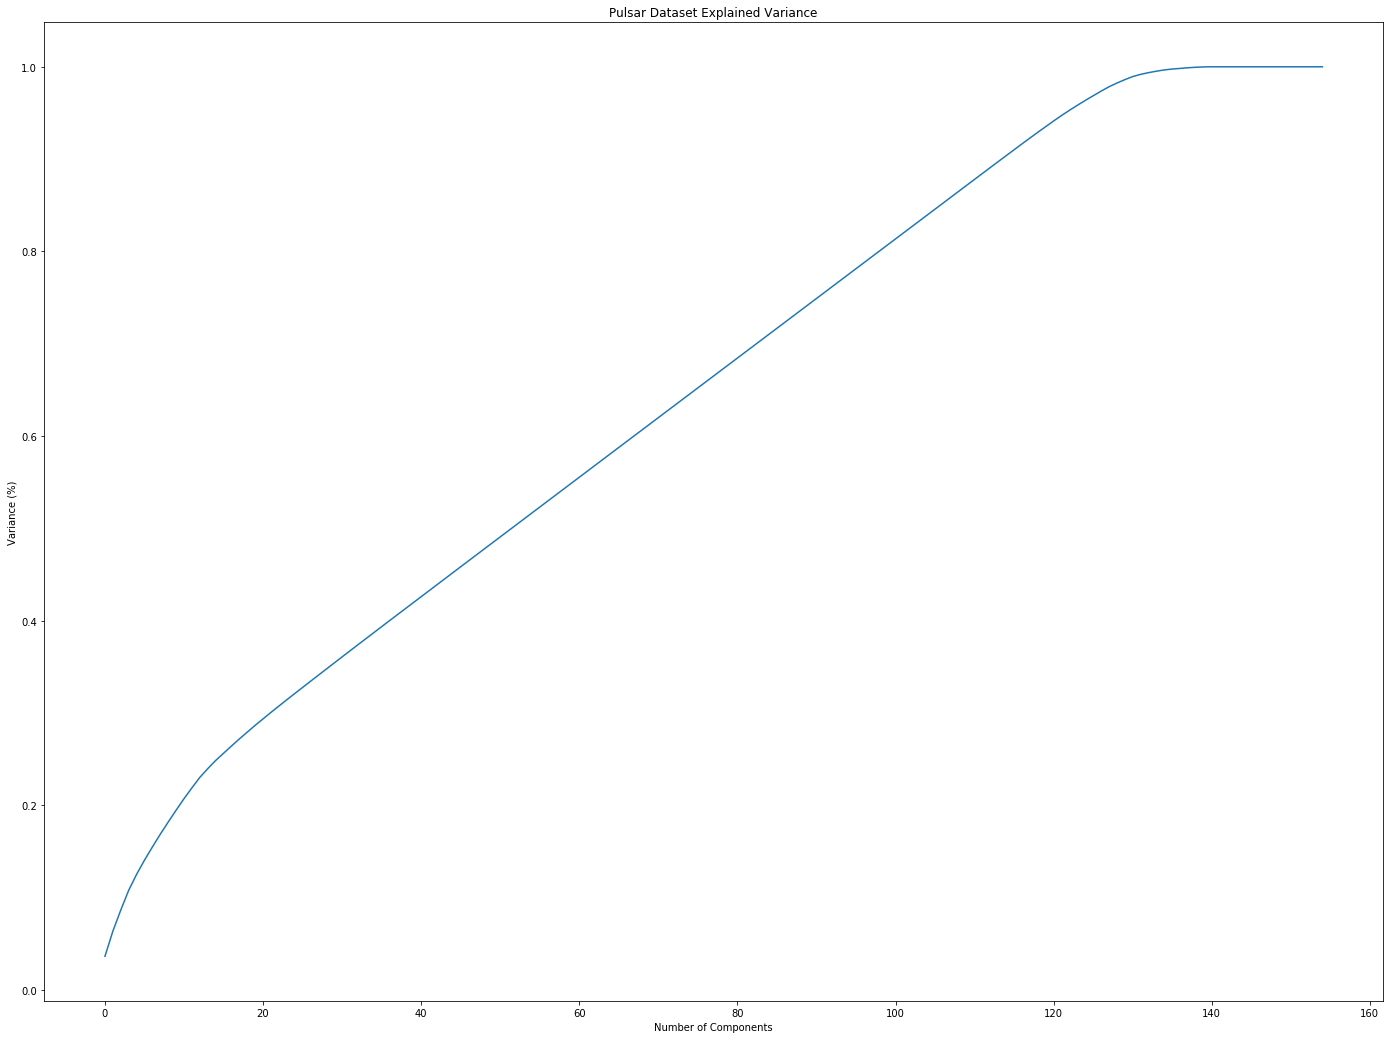

In [37]:
# Feature Extraction with PCA
from sklearn.decomposition import PCA
# feature extraction
pca = PCA()
pca.fit(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

Well this shows that after 130 variable there is no loss of variance. Thus we need . to keep 130 features according to relevance.

In [0]:
pca = PCA(n_components=130)
pca.fit(X)
X_pca = pca.transform(X)

Since the data is highly imbalanced there is lot if biasness in the dataset.
this is bound to give us errors. So we can do undersampling to get rid of that.

### Undersampling

In [152]:
y.value_counts()

0    49812
1      741
Name: Claim, dtype: int64

In [43]:
print(X_pca)

[[-8.51588091e-01  6.14829437e-01  2.82200228e+00 ... -5.48930940e-01
  -1.29180567e+00  1.40862071e-01]
 [-1.28599428e+00 -7.45409896e-01 -6.90933312e-01 ... -1.48608103e-01
   4.21985449e-01 -4.78423543e-02]
 [ 8.59048457e-01  2.19317341e+00  2.60353714e+00 ... -3.67037786e+00
  -5.68523832e-01 -1.17013572e+00]
 ...
 [ 1.13248661e+00  8.03315272e-01  6.39356687e-01 ... -6.77682160e-01
  -3.43339715e-01  3.93536640e+00]
 [-2.26041765e+00 -2.59387793e-01 -5.56261653e-01 ...  5.10759677e-01
  -4.13836182e-02 -3.15372345e-02]
 [-8.90980605e-02  1.86021030e-03 -4.25261723e-01 ...  1.78032803e-01
   4.24849115e-01 -2.98174753e-02]]


As we can see there is so much difference in the negative and poitive Claims. We are going to sample it accurately.

In [153]:
X = df_l.drop(['Claim'], axis=1)
y = df_l['Claim']
X['Claim'] = y
positive_claims = X.loc[X['Claim'] == 1]
negative_claims = X.loc[X['Claim'] == 0][:741]

undersample = pd.concat([positive_claims, negative_claims])
undersample['Claim'].value_counts()

1    741
0    741
Name: Claim, dtype: int64

## Evaluate Performance of ML Models

### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
y_undersample = undersample['Claim']
x_undersample = undersample.drop(['Claim'],axis =1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_undersample, y_undersample, test_size = 0.25, random_state = 0)

In [160]:
model_LR = LogisticRegression(class_weight = 'balanced')
model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)
predictions = pd.DataFrame(y_pred)
predictions[0].value_counts()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0    195
1    176
Name: 0, dtype: int64

In [161]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix
precision = precision_score(y_test,y_pred,labels=None,pos_label=1,average = "binary", sample_weight=None)
print(precision)
recall = recall_score(y_test, y_pred, labels=None, pos_label=1, average="binary", sample_weight=None)
print(recall)
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

0.8238636363636364
0.7591623036649214


,0,1
0,149,31
1,46,145


Wow, FINALLY logistic regression is giving Precision as 82% and recall as 75.9%

### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [163]:
predictions = pd.DataFrame(y_pred)
predictions[0].value_counts()

0    193
1    178
Name: 0, dtype: int64

In [164]:
precision = precision_score(y_test,y_pred,labels=None,pos_label=1,average = "binary", sample_weight=None)
print(precision)
recall = recall_score(y_test, y_pred, labels=None, pos_label=1, average="binary", sample_weight=None)
print(recall)
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

0.7471910112359551
0.6963350785340314


,0,1
0,135,45
1,58,133


Well, Random forest is giving us poor results as compared to Logistic regression.
Precision : 74.7%
Recall : 69.6%

### SVM

In [0]:
from sklearn.svm import SVC

In [0]:
clf = SVC(gamma=0.001, C=100.)

In [167]:
clf.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = clf.predict(X_test)

In [169]:
predictions = pd.DataFrame(y_pred)
predictions[0].value_counts()

0    192
1    179
Name: 0, dtype: int64

In [170]:
precision = precision_score(y_test,y_pred,labels=None,pos_label=1,average = "binary", sample_weight=None)
print(precision)
recall = recall_score(y_test, y_pred, labels=None, pos_label=1, average="binary", sample_weight=None)
print(recall)
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

0.7932960893854749
0.743455497382199


,0,1
0,143,37
1,49,142


Well, SVM has tried to work quite well. But not better than Logistic Regression. So the clear winner is Logistic regression with 76% Recall.

## Applying on Test Dataset

### Test Data Preparation

In [171]:
test.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,25902,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,58,ICELAND,49.5,29.7,NaN,47
1,19535,EPX,Travel Agency,Online,2 way Comprehensive Plan,4,SINGAPORE,20.0,0.0,NaN,24
2,43717,EPX,Travel Agency,Online,2 way Comprehensive Plan,68,VIET NAM,20.0,0.0,NaN,36
3,48271,EPX,Travel Agency,Online,2 way Comprehensive Plan,41,CHINA,28.0,0.0,NaN,36
4,52318,EPX,Travel Agency,Online,Cancellation Plan,16,SINGAPORE,11.0,0.0,NaN,36


In [172]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12661 entries, 0 to 12660
Data columns (total 11 columns):
ID                      12661 non-null int64
Agency                  12661 non-null object
Agency Type             12661 non-null object
Distribution Channel    12661 non-null object
Product Name            12661 non-null object
Duration                12661 non-null int64
Destination             12661 non-null object
Net Sales               12661 non-null float64
Commision (in value)    12661 non-null float64
Gender                  3605 non-null object
Age                     12661 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 1.1+ MB


In [0]:
test.rename(columns={'Commision (in value)':'Commision'}, 
                 inplace=True)

In [174]:
test['Duration'][test['Duration'] < 0] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
test['age_category'] = pd.cut(x=test['Age'], bins=[-1,17,36,65,120], labels=['0','1','2', '3'])

In [0]:
test  = pd.get_dummies(test, columns=['age_category'],prefix = ['age'])
test  = pd.get_dummies(test, columns=['Distribution Channel'],prefix = ['channel'])
test  = pd.get_dummies(test, columns=['Product Name'],prefix = ['product'])
test  = pd.get_dummies(test, columns=['Destination'],prefix = ['to'])
test  = pd.get_dummies(test, columns=['Agency'], prefix = ['agency'])
test  = pd.get_dummies(test, columns=['Agency Type'], prefix = ['agency_type'])

In [177]:
test = test.drop(['Gender','ID','Age'], axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12661 entries, 0 to 12660
Columns: 154 entries, Duration to agency_type_Travel Agency
dtypes: float64(2), int64(1), uint8(151)
memory usage: 2.1 MB


### Model application on Test Data

In [185]:
test_pred = model_LR.predict(test)
test_pred.mean()

0.2066187504936419